<center><img src = "https://images.unsplash.com/photo-1502033491742-0e11fb057e16?q=80&w=1332&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width="1200" height="600"/></center>

<center> photo credit: Julien Andrieux - Unsplash </center>

# Movie Data - Programmatic Data Handling
## *Harry Webber*

## 1. Data Setup

Firstly, we need to import the python libraries that we will need for the data handling and visualisation.

In [1]:
import numpy as np                # numpy! for mathematical operations
import seaborn as sns             # creating visualisations!
import matplotlib.pyplot as plt   # customising visualisations!
import pandas as pd               # dataframes & data analysis! -- general data use!

We then import the dataset using pandas and save it as our dataframe for the data handling.

In [2]:
## Create a dataframe called df and read in the csv from the local file
df = pd.read_csv('TMDB_movies.csv')

## 2. Initial Dataframe Inspection

### 2.1 Shape of the dataframe

We inspect the shape of the dataframe (how many rows and columns) and the first rows of the dataframe (using the `.head()` method) to understand what columns there are and what information is present in the data.

In [3]:
df.shape

(4803, 20)

> We find that there are 4803 rows/entries and 20 columns in the dataframe. 

In [4]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


My initial impressions, having inspected the dataframe are as follows:
1. The columns below are formatted in a manner that is not yet useful - seems to be some kind of nested dictionary...
    * 'genres'
    * 'keywords'
    * 'production_companies'
    * 'production_countries'
    * 'spoken_languages'
2. We also want to inspect the number of null values in each column of the dataframe.

### 2.2 Check for Missing Data

In [5]:
df.isnull().sum()    ## count the nulls in each column of the dataframe

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
def null_vals(dataframe):                                                 ## This function is copied from earlier in the training programme to show the percentage of missing data by column 
    null_vals = dataframe.isnull().sum()                                  ## How many nulls in each column
    total_cnt = len(dataframe)                                            ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null'])                  ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3)     ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

null_vals(df)

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


There are several columns involving null values and we will need to investigate or process them accordingly.
* **'homepage'** has 3091 nulls - this is a large proportion (64%) of the data which we should not simply remove, since it could affect the findings dramatically.
* **'overview'**, **'release_date'**, and **'runtime'** has 3, 1 and 2 nulls, respectively - we should investigate why this is but could remove these entries if required.
* **'tagline'** has 844 null values - ideally we should not remove these (it is nearly 18% of the data) and should find an alternative method for handling these.

I will first deal with the homepage 'column', then the 'tagline' and then the columns which have only 3 or fewer entries missing.

## 3. Null Handling

### 3.1 Standard Fill: 'homepage' data

Since the 'homepage' column only shows a website link to the homepage of each respective film - which I am unlikley to need for the data exploration - I have decided to fill the nulls of that column with a "flag" (a placeholder value) to indicate that the entry is missing data. It appears that the column consists of strings or objects, so once I have double checked the datatype, I can this with a null placeholder value. I decide not to use padding or backfilling here, since there is no consistent relation between the separate entries in the dataframe. The flag I will use is simply 'X' - to show that the 'homepage' data was not available.

In [7]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

The datatype is indeed an object (holding website links) which should work using any text string as a placeholder for the missing data, so we go ahead will the flagging process.

In [8]:
df['homepage'].fillna(
    value = 'X', ## our value - this is called 'static filling!' - there is only 1 value
    method = None,
    inplace = True)

C:\Users\harry\AppData\Local\Temp\ipykernel_2484\1979373612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['homepage'].fillna(


In [9]:
null_vals(df)  ## we now wish to confirm that there are no remaining NULL values in the 'homepage' column by running the previously defined function

,null,percent
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000
revenue,0,0.000


### 3.2 Standard Fill: 'tagline' data

On further inspection of the dataframe, the tagline column simply holds a short tagline for the film - which may have appeared on a poster for example, since there are a large number **(844)** missing entries in this column, it would be very time consuming and inefficient to try to figure them out individually at this stage. Therefore, we will follow the same process that we just carried out for the 'homepage' column, filling the missing values with a placeholder value 'X', for consistent signalling of missing data across the two columns.

In [10]:
df['tagline'].fillna(
    value = 'X', ## our value - this is called 'static filling!' - there is only 1 value
    method = None,
    inplace = True)

C:\Users\harry\AppData\Local\Temp\ipykernel_2484\4070506128.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tagline'].fillna(


In [11]:
null_vals(df)  ## we now wish to confirm that there are no remaining NULL values in the 'tagline' column by running the previously defined function

,null,percent
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
tagline,0,0.000
status,0,0.000
spoken_languages,0,0.000
revenue,0,0.000


### 3.3 Dropping Nulls: 'overview', 'runtime', 'release_date'

There are multiple options for handling the missing data in these columns.
* I could "custom fill" the runtime and release date with the means of their respective genres, for example.
* I could research and input an overview for those 3 entries.
* I could drop the entries since it only accounts for about 1% of the data.

Since this is just a single day data exploration task - I decide to just drop the remaining nulls in the interest of time.

In [12]:
df[df['overview'].isnull() | df['runtime'].isnull() | df['release_date'].isnull()]  ## we do a mask to check which entries are missing from these columns

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",X,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,X,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",X,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,X,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",X,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,X,Food Chains,7.4,8
4553,0,[],X,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,X,America Is Still the Place,0.0,0


It actually transpires that there is some overlap between the entries which have nulls in these columns, so rather than having to drop up to 6 entries from the dataframe, there are only 4 - **which is great!** We lose less data than expected!

*However, I am concerned that there are entries in other columns which are also missing data - yet are not showing as null since they currently just have punctuation holding the value in their respective cells. This is something that we may need to investigate further later on in the data cleaning process.*

In [13]:
df.dropna(
    axis = 0, # default is always to drop a row
    how = 'any', # default - if you set to 'all' - would only drop if every value is NULL
    subset = ['overview', 'runtime', 'release_date'],   # subset tells dropna which columns to consider
    inplace = True # makes change permanent
)

We have now dropped these null values and this affected the indexing on the dataframe since some have been removed, so we readjust this by reseting the index values.

In [14]:
df.reset_index()    # after dropping values to not have 'gaps'

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",X,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4795,4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",X,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4796,4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,X,"Signed, Sealed, Delivered",7.0,6
4797,4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,"[{""iso_3166_1"": ""US""

Furthermore, we can now check for any remaining nulls in the initial dataframe... using the same `isnull()` method as before.

In [15]:
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

**The dataframe now appears to be 'clean' - at least there are no null values.**

## 4. Further Data Cleaning

I mentioned the following in the initial dataframe inspection section...
> A number of columns are format in a manner that is not particularly useful - for example, involving extraneous punctuation marks, these include:
**'genres', 'keywords', 'production_companies', 'production_countries', and 'spoken_languages'**

I should now investigate this further before trying to interpret the data, since I have concerns that some of this consists of more missing data.

In [16]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [17]:
## I can't actually see the full text of the cells here since they are too long to be displayed...

pd.set_option('display.max_colwidth', None)  # Shows full content of each cell
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret agent""}, {""id"": 9663, ""name"": ""sequel""}, {""id"": 14555, ""name"": ""mi6""}, {""id"": 156095, ""name"": ""british secret service""}, {""id"": 158431, ""n

Upon further inspection, I can see the following...
* The 'genres' column contains information relating to a dictionary of genres, where each genre has its own ID
* The 'keywords' column contains similar information but with a dictionary of keywords
* The 'production_companies' is a dictionary of production companies
* 'production_countries' and 'spoken_languages' are similarly dictionaries

> At this point, I needed some support from my manager in resolving these in a timely manner - he suggested that I could install the library 'ast' - standing for Abstract Syntax Tree - which allows you to format data of given code structures.
> He also provided me with a function ('extract_genres') below, which helps with this process of parsing the data into an appropriate format. 

### 4.1: Formatting the Genres

In [18]:
import ast
ast.literal_eval(df.genres[0])[0]['name']

'Action'

In [19]:
def extract_genres(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the Genres
    return Genres

## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

In [20]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret agent""}, {""id"": 9663, ""name"": ""sequel""}, {""id"": 14555, ""name"": ""mi6""}, {""id"": 156095, ""name"": ""british secret service""}, {""id"": 158431, ""name"": ""united kingdom""}]",en,Spectre,"A cryptic message from Bond’s past sends him on a trail to uncover

### 4.2: Formatting the Keywords

Since this was quite effective - we will try the same thing for the keywords and other columns involving these nested dictionary datatypes.

In [21]:
def extract_keyword(x):
    ''' Function to extract keywords for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Keywords = [] ## Empty list to store the keywords
    
    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Keywords.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the Keywords
    return Keywords

## Apply the function to keywords column
df['extracted_keywords'] = df['keywords'].apply(extract_keyword)

In [22]:
df.head() ## check the new column looks appropriate

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, shipwreck, strong woman, ship, alliance, calypso, afterlife, fighter, pirate, swashbuckler, aftercreditsstinger]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures

### 4.3: Formatting the Production Companies

In [23]:
def extract_company(x):
    ''' Function to extract production companies for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Companies = [] ## Empty list to store the Companies
    
    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Companies.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the Companies
    return Companies

## Apply the function to production_companies column
df['extracted_production_companies'] = df['production_companies'].apply(extract_company)

In [24]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]","[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, shipwreck, strong woman, ship, alliance, calypso, afterlife, fighter, pirate, swashbuckler, aftercreditsstinger]","[Walt Disney Pictures, Jerry Br

### 4.4: Formatting the Production Countries

In [25]:
def extract_country(x):
    ''' Function to extract production countries for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Countries = [] ## Empty list to store the Countries
    
    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Countries.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the Countries
    return Countries

## Apply the function to production_countries column
df['extracted_production_countries'] = df['production_countries'].apply(extract_country)

In [26]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]","[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]","[United States of America, United Kingdom]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, shipwreck, strong woman, ship, alliance, calypso, afterlife, fighter, pirate, swashbuckler

### 4.5: Formatting the Spoken Languages

In [27]:
def extract_language(x):
    ''' Function to extract spoken languages for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Languages = [] ## Empty list to store the Languages
    
    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Languages.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the Languages
    return Languages

## Apply the function to spoken_languages column
df['extracted_spoken_languages'] = df['spoken_languages'].apply(extract_language)

In [28]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]","[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]","[United States of America, United Kingdom]","[English, Español]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, shipwreck, strong woman, ship, alliance, calypso, afterlife, fighter, pirate, swashbuckler, aftercreditsstinger]","[Walt Disney Pictures, Jerry Bruckheimer Films, Second Mate Productions]",[United States of America

### 4.6: Dropping Unwanted Columns

Since the dataframe is getting quite crowded now with 5 additional columns, I will remove the original columns and keep the extracted information for use in data interpretation and visualisation stages.

In [29]:
df = df.drop(columns=['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages'])
df.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]","[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]","[United States of America, United Kingdom]","[English, Español]"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, shipwreck, strong woman, ship, alliance, calypso, afterlife, fighter, pirate, swashbuckler, aftercreditsstinger]","[Walt Disney Pictures, Jerry Bruckheimer Films, Second Mate Productions]",[United States of America],[English]
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,"A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.",107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi6, british secret service, united kingdom]","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]"
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's crimes to protect the late attorney's reputation and is subsequently hunted by the Gotham City Police Department. Eight years later, Batman encounters the mysterious Selina Kyle and the villainous Bane, a new terrorist leader who overwhelms Gotham's finest. The Dark Knight resurfaces to protect a city that has branded him an enemy.",112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret identity, burglar, hostage drama, time bomb, gotham city, vigilante, cover-up, superhero, villainess, tragic hero, terrorism, destruction, catwoman, cat burglar, imax, flood, criminal underworld, batman]","[Legendary Pictures, Warner Bros., DC Entertainment, Syncopy]",[United States of America],[English]
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military captain who's inexplicably transported to the mysterious and exotic planet of Barsoom (Mars) and reluctantly becomes embroiled in an epic conflict. It's a world on the brink of collapse, and Carter rediscovers his humanity when he realizes the survival of Barsoom and its people rests in his hands.",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action,

In [30]:
## I also don't want the 'overview' column as there is a long string of text in this and it will not be particularly useful in the data visualisations I have in mind.

df = df.drop(columns=['overview'])
df.head()

,budget,homepage,id,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]","[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]","[United States of America, United Kingdom]","[English, Español]"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, shipwreck, strong woman, ship, alliance, calypso, afterlife, fighter, pirate, swashbuckler, aftercreditsstinger]","[Walt Disney Pictures, Jerry Bruckheimer Films, Second Mate Productions]",[United States of America],[English]
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi6, british secret service, united kingdom]","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]"
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret identity, burglar, hostage drama, time bomb, gotham city, vigilante, cover-up, superhero, villainess, tragic hero, terrorism, destruction, catwoman, cat burglar, imax, flood, criminal underworld, batman]","[Legendary Pictures, Warner Bros., DC Entertainment, Syncopy]",[United States of America],[English]
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel, princess, alien, steampunk, martian, escape, edgar rice burroughs, alien race, superhuman strength, mars civilization, sword and planet, 19th century, 3d]",[Walt Disney Pictures],[United States of America],[English]


## 5. Data Exploration

### 5.1 Initial Ideas

To get a sense of what the data actually says, I will first use the `.describe()` method to see the summary statistics for each of the numeric datatypes.

In [31]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.799000e+03,4799.000000,4799.000000,4.799000e+03,4799.000000,4799.000000,4799.000000
mean,2.906593e+07,56899.920192,21.509884,8.232920e+07,106.903105,6.094186,690.789123
std,4.073251e+07,88236.500208,31.824074,1.629076e+08,22.561305,1.188340,1234.941795
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.500000,4.685547,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.000000,12.929525,1.918402e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58461.500000,28.350728,9.295652e+07,118.000000,6.800000,737.500000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


My intial thoughts are as follows...
* It is difficult to understand the **budget** and **revenue** columns since the numbers are large and not instantly simple to interpret - these will need further investigation.
* The summary statistics for ID are probably not particularly helpful.
* I don't fully understand the relationship between things like **vote_average** and **popularity** at this stage, but they seem to be similar metrics - just with vote_average being a score out of 10.
* It may be interesting to filter/mask the popularity measures by those which have received at least a certain threshold of votes in **vote_count**.
* It could also be interesting to investigate the runtime and see what impact this has on other metrics of the films (what film is 338 minutes long?!).

### 5.2 Checking Correlations

> Following this, it makes sense to check the correlations between some of these numeric metric within the dataframe...

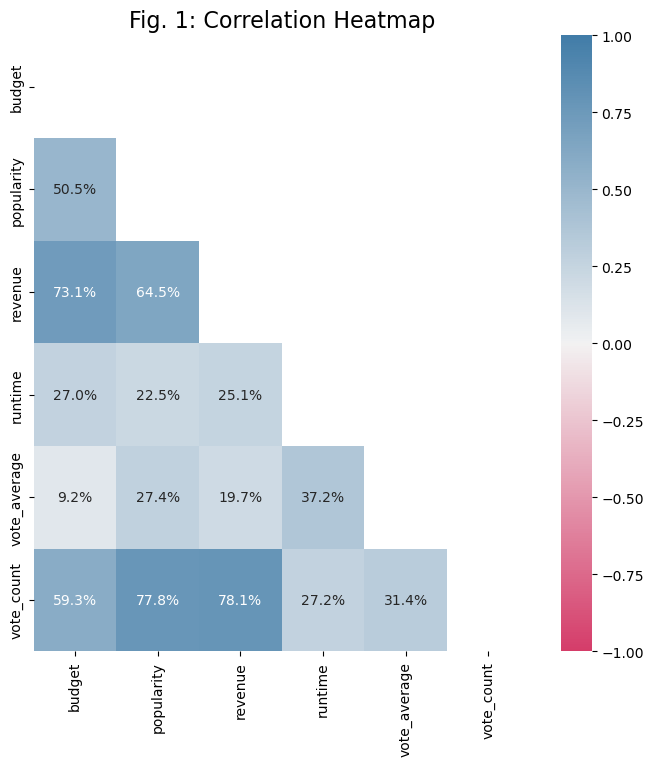

In [32]:
# Firstly, I select the columns which I wish to check for correlation between

corr_values = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]   # all numeric columns except 'id'

plt.figure(figsize = (8,8))                                                                      # set the figure size
sns.heatmap(corr_values.corr(),                                                                  # I want to make a heatmap effectively showing a correlation matrix between these columns
            annot = True,
            fmt = '.1%',
            cmap=sns.diverging_palette(0, 240, as_cmap=True),                                    # colour palette set to diverge from red to blue with red indicating negative correlation and blue indicating positive
            vmin = -1, vmax = +1,
            mask = np.triu(corr_values.corr()))                                                  # this masks it as a triangle to not show any duplicates or the diagonal where correlation = 1

plt.title('Fig. 1: Correlation Heatmap', fontsize = 16)                                          # naming the plot
plt.show()

# If I instead wanted to save the chart as a .png file, I would use the following code
# plt.savefig('movies_correlation_heatmap.png', dpi = 300, bbox_inches = 'tight')

> This correlation heatmap has no negative correlation at all - which is an interesting insight in itself - but the correlations do range from being basically trivial to quite strong.
> * There are few surprises in the fact that **budget** is correlated with **revenue** since the film may include bigger 'stars' and have had more promotion.
> * **Revenue** is correlated quite strongly with **popularity**, but there is weak correlation with **vote_average**.
> * In fact, **vote_average** and **popularity** only share a weak correlation themselves which seems strange to me.
>     * Both seem to be related to how good a film is.
>     * However, I suppose a film can be popular without being highly rated.
>     * Many 'blockbusters' or 'big comedy' films are purely for entertainment - but are quite poor aesthetically (this is sometimes even deliberate!)

### 5.3 Looking at Revenue

Since revenue is quite strongly correlated with budget, but also with things like vote_count and even popularity, I investigate the films by revenue first.

> For this section:
> * We define a new metric: 'performance ratio' as 'revenue over budget' (i.e. how many times its budget did it make?)
> * We consider only the most voted films (those with over 5000 votes - top 84 in the dataframe) since they have at least been viewed by a statistically significant number of people.

In [33]:
df['performance_ratio'] = df['revenue'] / df['budget']     # How many times the film budget did it make in revenue

In [34]:
most_voted = df[df['vote_count'] > 5000]                   # I am mainly interested here in films which many people have seen / have received a good number of votes

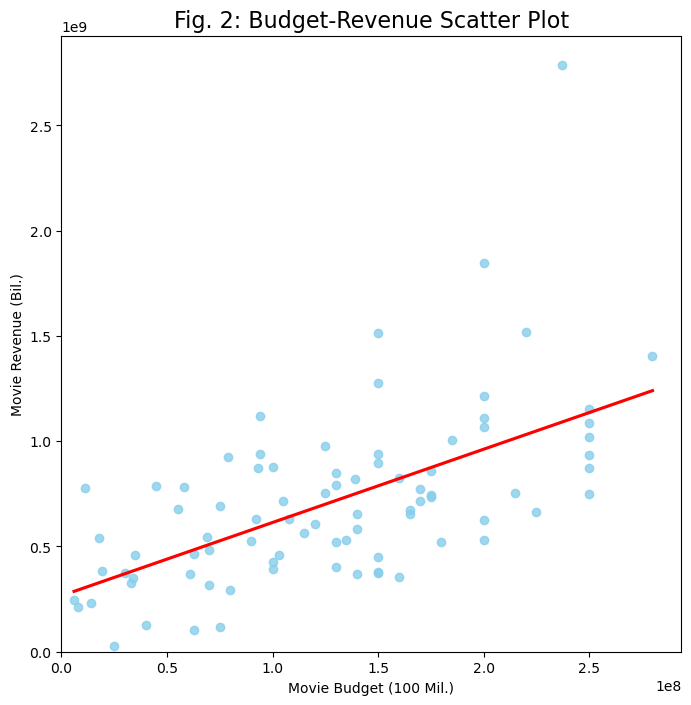

In [35]:
plt.figure(figsize = (8,8))
sns.regplot(data=most_voted, x='budget', y='revenue', color = "green", scatter_kws={"color": "skyblue"}, line_kws={"color": "red"}, ci = None)

plt.xlabel('Movie Budget (100 Mil.)')
plt.ylabel('Movie Revenue (Bil.)')

plt.xlim(0, )                                                       # Set x-axis limits
plt.ylim(0, )                                                       # Set y-axis limits

plt.title('Fig. 2: Budget-Revenue Scatter Plot', fontsize = 16)     # naming the plot
plt.show()

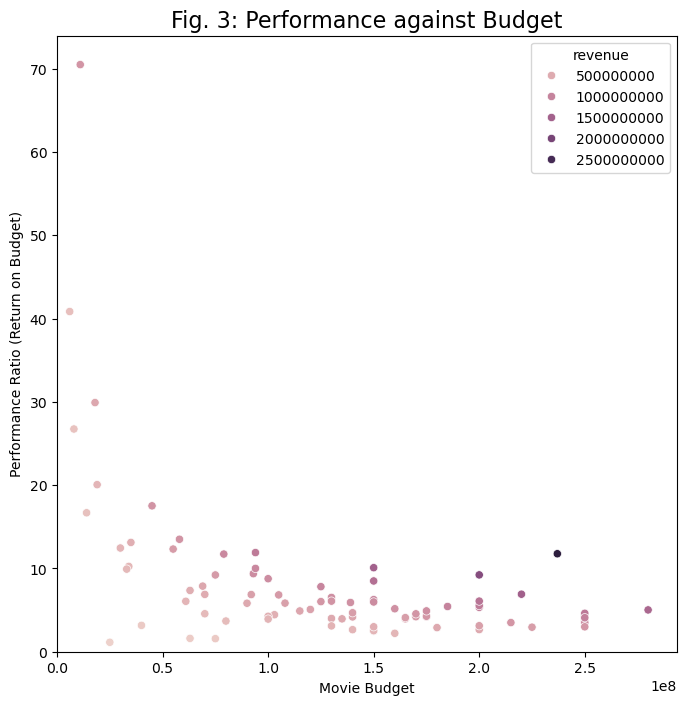

In [36]:
plt.figure(figsize = (8,8))
sns.scatterplot(data=most_voted, x='budget', y='performance_ratio', hue = 'revenue')

plt.xlabel('Movie Budget')
plt.ylabel('Performance Ratio (Return on Budget)')                      # How many times the film budget did it make in revenue

plt.xlim(0, )                                                           # Set x-axis limits
plt.ylim(0, )                                                           # Set y-axis limits

plt.title('Fig. 3: Performance against Budget', fontsize = 16)          # naming the plot
plt.show()

In [37]:
most_voted[most_voted['performance_ratio'] > 70]              # what is the outlier at the very top of this graph??

,budget,homepage,id,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages,performance_ratio
2912,11000000,http://www.starwars.com/films/star-wars-episode-iv-a-new-hope,11,en,Star Wars,126.393695,1977-05-25,775398007,121.0,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6624,"[Adventure, Action, Science Fiction]","[android, galaxy, hermit, death star, lightsaber, jedi, rescue mission, empire, rebellion, planet, smuggler, the force, space opera, galactic war, stormtrooper, totalitarianism]","[Lucasfilm, Twentieth Century Fox Film Corporation]",[United States of America],[English],70.490728


#### Keypoint 1: Risk-Reward

> * The film with the overall highest revenue (see fig. 2) is **Avatar**.
> * This is also among the highest budget films in the dataframe.
> * Rolling out a film with a large budget is a **big risk** for production companies as there are also many high budget films which don't yield such high revenue - i.e. "commercial flops".
> * When we look at the fig. 3 - we see that there are a large number of lower budget films yielding huge performance ratios (i.e. high percentage profit).
> * We should be careful here, since we have already masked to show only the top 84 most reviewed - many low budget films are unlikely to make it into this bracket.
> * The uppermost point in fig. 3 - making over 70 times the budget of the film - and the film to make if you want to be successful in the film industry is...

##### surprise surprise...

**<center>Star Wars</center>**

<center><img src = "https://images.unsplash.com/photo-1546561892-65bf811416b9?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width="500" height="400"/></center>

<center> photo credit: Tommy Van Kessel - Unsplash </center>

So, if you want to make a commercially successful film, just make a film which will start a massive, decade-spanning franchise -- easy right?? ;)

### 5.4 Which Films are Rated Highly?

Looking back at the correlation heatmap - we also see that **vote_average** is not strongly correlated with any other metric in the dataframe. In fact the correlation coefficient is never more than 0.4 which indicates (at most) moderate correlation. So I am also interested to try to establish more about what makes certain films popular among the people who have voted?

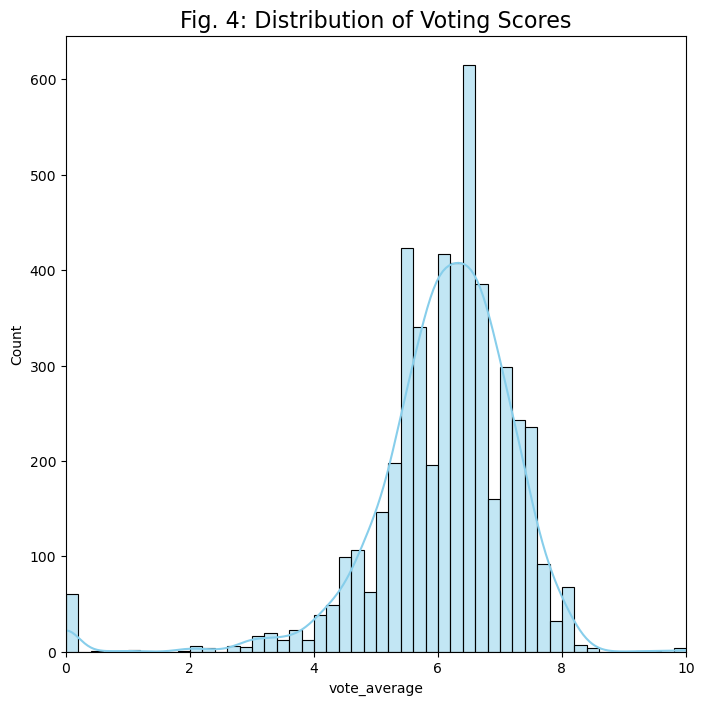

In [38]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df, x="vote_average", binwidth = 0.2, color = "skyblue", kde=True)
plt.xlim(0, 10)

plt.title('Fig. 4: Distribution of Voting Scores', fontsize = 16)

plt.show()

Looking at the distribution of films here - we see confirm that there is something close to a normal distribution with a mean just over 6. But I am interested at the moment in the highest rated films - so I will look at those with an average rating of over 8. Initially this creates a list of 50 films - however, some of these are quite niche and only have high ratings because they have so few voters anyway (maybe there are a few "mega-fans" but this is not really statistically significant). I want a set of films with the following restrictions...
* Average rating (vote_average) is greater than 8.
* Number of votes (vote_count) is greater than 1000.

In [39]:
elite_tier = df[(df['vote_average'] > 8) & (df['vote_count'] > 1000)]       # create a subset of the dataframe which only contains the films with ratings over 8 from over 1000 reviews

Instinctively, I am intereseted to see if there is anything that these "elite tier" films have in common. I decided to look at the genres of the films.

In [40]:
elite_tier['extracted_genres'].value_counts()                               # check the genres of these top rated films

extracted_genres
[Drama]                                                    6
[Drama, Crime]                                             6
[Adventure, Action, Science Fiction]                       2
[Western]                                                  2
[Adventure, Fantasy, Action]                               1
[Fantasy, Drama, Crime]                                    1
[Mystery, Thriller]                                        1
[Drama, Crime, Thriller]                                   1
[Thriller, Crime]                                          1
[Drama, Thriller]                                          1
[Fantasy, Adventure, Animation, Family]                    1
[Horror, Thriller]                                         1
[Adventure, Fantasy, Animation]                            1
[Drama, Horror, Thriller]                                  1
[Crime, Drama, Thriller]                                   1
[Adventure, Drama, Science Fiction]                        1
[Fantas

Many of the films here have **'Drama'** as either a main genre - or one in a list of subgenres - this suggests that highly rated films are often in the 'Drama' genre. **Let's explore this a bit further...**

I can do this by splitting the dataframe into those films which do have drama in the list of genres, and those which don't...

In [41]:
drama_mask = df['extracted_genres'].apply(lambda x: 'Drama' in x)                     # used a lambda function to iterate through the dataframe and find all films which have Drama as a genre
drama_films = df[drama_mask]                                                          # used this as a mask on the dataframe

non_drama_mask = df['extracted_genres'].apply(lambda x: 'Drama' not in x)             # repeat for those which do *not* have Drama as a genre
non_drama_films = df[non_drama_mask]

In [42]:
drama_films.shape                # used this to check the number of films with drama as a genre - 2296

(2296, 20)

In [43]:
non_drama_films.shape            # used this to check the number of films without drama as a genre - 2503

(2503, 20)

In [44]:
drama_films['is_drama'] = 'drama'                                                # created an extra column showing 'drama' if drama is one of the genres and 'not drama' if it is not
non_drama_films['is_drama'] = 'not drama'

# Concatenate
drama_df = pd.concat([drama_films, non_drama_films], ignore_index=True)          # concatenated these together into one dataframe for the visualisation -- ignore index argument creates a new consistent index ignoring the originals

C:\Users\harry\AppData\Local\Temp\ipykernel_2484\3636573673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drama_films['is_drama'] = 'drama'                                                # created an extra column showing 'drama' if drama is one of the genres and 'not drama' if it is not
C:\Users\harry\AppData\Local\Temp\ipykernel_2484\3636573673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_drama_films['is_drama'] = 'not drama'


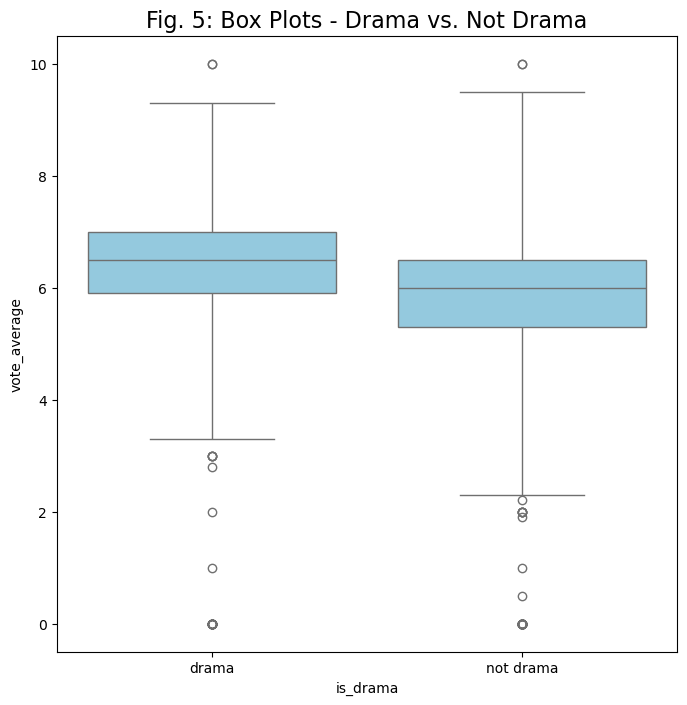

In [45]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='is_drama', y='vote_average', data=drama_df, color = 'skyblue', whis = 2.5)            # split the data by the new column 'is_drama' to make comparative boxplots

plt.title('Fig. 5: Box Plots - Drama vs. Not Drama', fontsize = 16)

plt.show()

#### Keypoint 2: Bring the Drama!

> * Films which have 'drama' listed as a genre are consistently rated higher by voters than those which do not.
> * Drama films have a median rating of **6.5** while non-drama films have a median rating of **6.0**.
> * Drama films have a mean rating of **6.4** (1 d.p.) while non-drama have mean rating of **5.8** (1 d.p.).
> * Drama films are also more consistently high rated with a lower range and interquartile range than the non-drama films.
> * **We could say that if you want to make a highly rated film - make a drama** - but we should be careful about conflating the trend here with a direct causation.
> * I do have some concerns about any films which are missing information on genre being bundled together - they may be low-budget / niche films - likely to be low rated.

In [46]:
non_drama_films['vote_average'].describe()   # for checking summary statistics of non-drama films

count    2503.000000
mean        5.824491
std         1.234553
min         0.000000
25%         5.300000
50%         6.000000
75%         6.500000
max        10.000000
Name: vote_average, dtype: float64

In [47]:
drama_films['vote_average'].describe()   # for checking summary statistics of drama films

count    2296.000000
mean        6.388197
std         1.060610
min         0.000000
25%         5.900000
50%         6.500000
75%         7.000000
max        10.000000
Name: vote_average, dtype: float64

## 6. Single Observation Analysis

Since I haven't really yet had an opportunity to analyse the meaning of this 'popularity' metric - I will do so to some extent, by choosing the two "most popular" films according to this metric. They are **Minions** and **Interstellar**.

<center><img src = "https://images.unsplash.com/photo-1515041219749-89347f83291a?q=80&w=1074&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width="600" height="500"/></center>

<center> photo credit: Justin Lim - Unsplash </center>

In [49]:
df[df['popularity'] == df['popularity'].max()]       # find the most 'popular' film by this metric

,budget,homepage,id,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages,performance_ratio
546,74000000,http://www.minionsmovie.com/,211672,en,Minions,875.581305,2015-06-17,1156730962,91.0,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcreditsstinger, evil mastermind, minions, 3d]","[Universal Pictures, Illumination Entertainment]",[United States of America],[English],15.631499


In [48]:
df[df['popularity'] > 700]                            # look at the films with over 700 popularity - I just played around with the numbers here a little after finding the max was minions with 875

,budget,homepage,id,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages,performance_ratio
95,165000000,http://www.interstellarmovie.net/,157336,en,Interstellar,724.247784,2014-11-05,675120017,169.0,Released,Mankind was born on Earth. It was never meant to die here.,Interstellar,8.1,10867,"[Adventure, Drama, Science Fiction]","[saving the world, artificial intelligence, father son relationship, single parent, nasa, expedition, wormhole, space travel, famine, black hole, dystopia, race against time, quantum mechanics, spaceship, space, rescue, family relationships, farmhouse, robot, astronaut, scientist, father daughter relationship, single father, farmer, space station, imax, astrophysics, zero gravity, courage, time paradox, relativity]","[Paramount Pictures, Legendary Pictures, Warner Bros., Syncopy, Lynda Obst Productions]","[Canada, United States of America, United Kingdom]",[English],4.091636
546,74000000,http://www.minionsmovie.com/,211672,en,Minions,875.581305,2015-06-17,1156730962,91.0,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcreditsstinger, evil mastermind, minions, 3d]","[Universal Pictures, Illumination Entertainment]",[United States of America],[English],15.631499


When comparing these two films, there are a number of different insights to be made, the table below shows some of the key information and metrics of these two films from the dataframe...

| Metric                                 | Interstellar                                                   | Minions                                     | Insights                                |
| --------                               | --------                                                       | --------                                    | --------                                |
| **Production Companies**               | Paramount - Legendary - Warner Bros. - Syncopy - Lynda Obst    | Universal - Illumination                    | Completely unique production            |
| **Release Date**                       | 2014-11-05                                                     | 2015-06-17                                  | Similar year - different quarters       |
| **Genre(s)**                           | Adventure - Drama - Science Fiction                            | Family - Animation - Adventure - Comedy     | Very different (but both 'Adventure')   |
| **Budget**                             | 165,000,000                                                    | 74,000,000                                  | Interstellar more than double           |
| **Revenue**                            | 675,120,017                                                    | 1,156,730,962                               | Both strong performers                  |
| **Performance Ratio (1 d.p.)**         | 4.1                                                            | 15.6                                        | Minions was a huge commercial success   |
| **Rating (vote_average)**              | 8.1                                                            | 6.4                                         | Interstellar top-rated                  |
| **Number of Reviews (vote_count)**     | 10,867                                                         | 4571                                        | Maybe family/children review less       |

> **<u>Interstellar**
> * Clearly a very **highly rated** film with 8.1 average vote (among top 50 in dataset).
> * Contextually we know that it is more **targeted at adults** (BBFC rated as a 12 [https://www.bbfc.co.uk/release/interstellar-q29sbgvjdglvbjpwwc0zode4nzi]).
> * **Good revenue** making over 4 times its budget - but there was a relatively **high budget** initially.
> * **Cast and crew** costs may have been high with stars like Matthew McConaughey, Anne Hathaway, Jessica Chastain and director: Christopher Nolan [https://www.imdb.com/title/tt0816692/].
>
> **<u>Minions**
> * Not such a high rating (only just above average) and fewer votes. However, children are probably the main target audience and are unlikely to be voting.
> * Being a **family film** and comedy means it has a broad audience - also better **potential for merchandise sales**.
> * **Huge commercial success** with massive revenue and seems even better when we note that it made over 15 times the budget for the film.
> * We should note that this was **not the first film in the 'Despicable Me' universe** and so production companies were likely to be confident in its popularity and success.
>
> **<u>Overall Comparison**
> * **Commercially, Minions was the more successful film** in yielding massive revenue from a budget less than half that of Interstellar.
> * **From a ratings perspective: Interstellar appears to have considerably higher reviews** and is in fact considered one of the best films in the dataset.
> * Whilst they are both very different films stylistically, it is easy to see why both were popular in their own way.
> * Also interesting to note that Minions was released in the Summer window (for school holidays?).
> * Whereas, Interstellar was released in November (ahead of Christmas and potentially considering awards season).